In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [97]:
df_id = df

In [4]:
df.shape

(1460, 81)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_1 = df
df= df.drop(['Id'], axis =1)


In [10]:
# df['Target'] =  df["SalePrice"]
df["SalePrice"].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [11]:
Y = df["SalePrice"]

In [12]:
X = df.drop(['SalePrice'], axis =1)

In [13]:
Y.mean()

180921.19589041095

In [14]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include = 'object')

In [15]:
num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [16]:
print('df.shape',X.shape)
print("x_num.shape", num.shape)
print("x_char.shape", char.shape)

df.shape (1460, 79)
x_num.shape (1460, 36)
x_char.shape (1460, 43)


In [17]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
MSSubClass,15
LotFrontage,110
LotArea,1073
OverallQual,10
OverallCond,9


In [18]:
slice1= df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list =slice1.index
cat = num.loc[:,cat_list]
cat.dtypes


MSSubClass      int64
OverallQual     int64
OverallCond     int64
BsmtFullBath    int64
BsmtHalfBath    int64
FullBath        int64
HalfBath        int64
BedroomAbvGr    int64
KitchenAbvGr    int64
TotRmsAbvGrd    int64
Fireplaces      int64
GarageCars      int64
3SsnPorch       int64
PoolArea        int64
MoSold          int64
YrSold          int64
dtype: object

In [19]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [20]:
slice2

,feature_levels
LotFrontage,110
LotArea,1073
YearBuilt,112
YearRemodAdd,61
MasVnrArea,327
BsmtFinSF1,637
BsmtFinSF2,144
BsmtUnfSF,780
TotalBsmtSF,721
1stFlrSF,753


In [21]:
num.shape

(1460, 20)

In [22]:
char = pd.concat([char,cat],axis =1 ,join = "inner")

In [23]:
char.shape

(1460, 59)

In [24]:
num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0


In [25]:
num.describe(percentiles= [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,15.060959,43.489041
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,55.757415,496.123024
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,21.000000,1680.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,34.000000,3311.700000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,44.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,1945.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000


In [26]:
def outlier_cap(x):
    x= x.clip(lower = x.quantile(0.1))
    x=x.clip(upper = x.quantile(0.99))
    return(x)

In [27]:
num = num.apply(lambda x:outlier_cap(x))

In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.786844,10232.962740,1972.495479,1984.861644,101.174793,438.530240,44.404589,572.054897,1075.300103,1168.286507,345.021781,4.893151,1519.043288,1980.089195,486.006747,93.155411,45.825548,21.434760,14.326541,19.482192
std,19.730801,4845.088112,27.721189,20.640499,168.046772,429.049203,148.265347,427.915118,361.027417,350.248242,430.816964,39.450730,483.104982,21.591840,182.959282,120.812804,61.985174,58.382129,51.369279,104.884363
min,44.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,1945.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,44.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,1945.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,44.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,1945.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,44.000000,5000.000000,1924.990000,1950.000000,0.000000,0.000000,0.000000,74.990000,636.990000,756.990000,0.000000,0.000000,912.000000,1945.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000


In [29]:
num.isnull().mean()

LotFrontage      0.177397
LotArea          0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
GarageYrBlt      0.055479
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
ScreenPorch      0.000000
MiscVal          0.000000
dtype: float64

In [30]:
char.isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [31]:
num = num.loc[:,num.isnull().mean()<=0.25]
char = char.loc[:,char.isnull().mean()<=0.25]

In [32]:
num.shape

(1460, 20)

In [33]:
num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,65.0,8450.0,2003.0,2003,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0,1710.0,2003.0,548.0,0.0,61.0,0.00,0.0,0
1,80.0,9600.0,1976.0,1976,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0,1262.0,1976.0,460.0,298.0,0.0,0.00,0.0,0
2,68.0,11250.0,2001.0,2002,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0,1786.0,2001.0,608.0,0.0,42.0,0.00,0.0,0
3,60.0,9550.0,1924.9,1970,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0,1717.0,1998.0,642.0,0.0,35.0,261.05,0.0,0
4,84.0,14260.0,2000.0,2000,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0,2198.0,2000.0,836.0,192.0,84.0,0.00,0.0,0


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
num_1 = pd.DataFrame(imputer.fit_transform(num), index = num.index, columns = num.columns)

In [35]:
num_1.shape

(1460, 20)

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
char_1 = pd.DataFrame(imputer.fit_transform(char), index = char.index, columns = char.columns)

In [37]:
char_1.shape

(1460, 54)

# Feature Importance

In [38]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)

cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [39]:
num_2.iloc[0]

LotFrontage        65.0
LotArea          8450.0
YearBuilt        2003.0
YearRemodAdd     2003.0
MasVnrArea        196.0
BsmtFinSF1        706.0
BsmtFinSF2          0.0
BsmtUnfSF         150.0
TotalBsmtSF       856.0
1stFlrSF          856.0
2ndFlrSF          854.0
LowQualFinSF        0.0
GrLivArea        1710.0
GarageYrBlt      2003.0
GarageArea        548.0
WoodDeckSF          0.0
OpenPorchSF        61.0
EnclosedPorch       0.0
ScreenPorch         0.0
MiscVal             0.0
Name: 0, dtype: float64

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.tail()

,LotFrontage_Rank,LotArea_Rank,YearBuilt_Rank,YearRemodAdd_Rank,MasVnrArea_Rank,BsmtFinSF1_Rank,BsmtFinSF2_Rank,BsmtUnfSF_Rank,TotalBsmtSF_Rank,1stFlrSF_Rank,2ndFlrSF_Rank,LowQualFinSF_Rank,GrLivArea_Rank,GarageYrBlt_Rank,GarageArea_Rank,WoodDeckSF_Rank,OpenPorchSF_Rank,EnclosedPorch_Rank,ScreenPorch_Rank,MiscVal_Rank
1455,3.0,1.0,7.0,5.0,0.0,0.0,0.0,8.0,4.0,3.0,2.0,0.0,5.0,7.0,3.0,0.0,2.0,0.0,0.0,0.0
1456,7.0,7.0,5.0,3.0,2.0,4.0,1.0,5.0,8.0,9.0,0.0,0.0,7.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0
1457,3.0,3.0,1.0,8.0,0.0,1.0,0.0,7.0,6.0,6.0,4.0,0.0,8.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1458,4.0,4.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0
1459,6.0,4.0,4.0,1.0,0.0,5.0,1.0,1.0,7.0,6.0,0.0,0.0,2.0,2.0,0.0,4.0,3.0,0.0,0.0,0.0


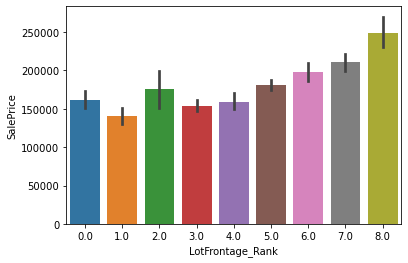

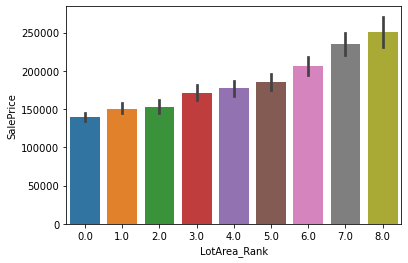

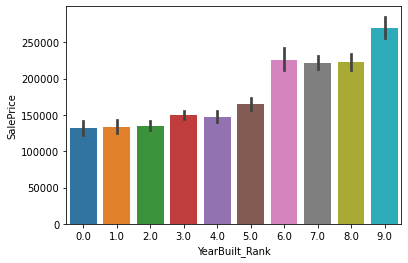

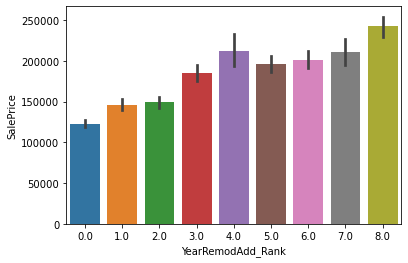

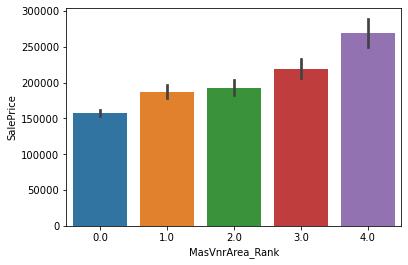

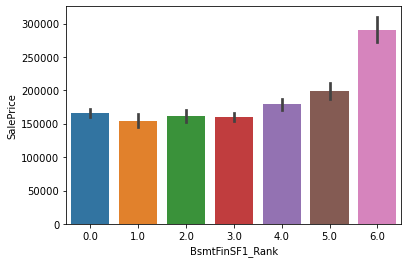

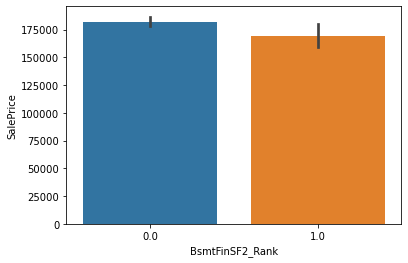

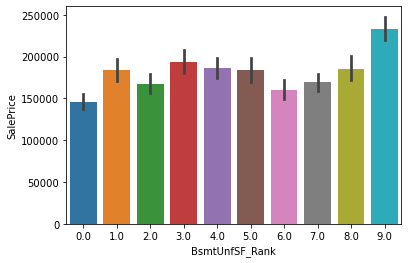

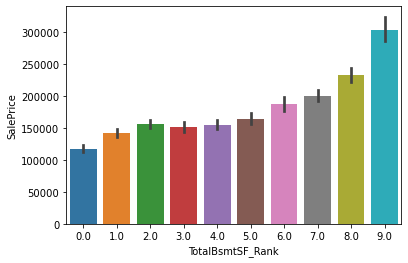

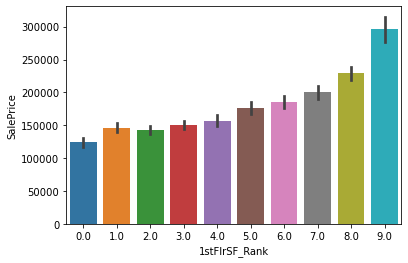

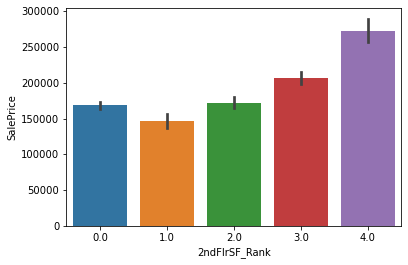

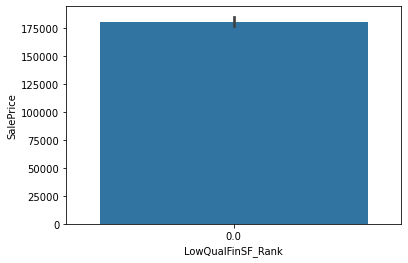

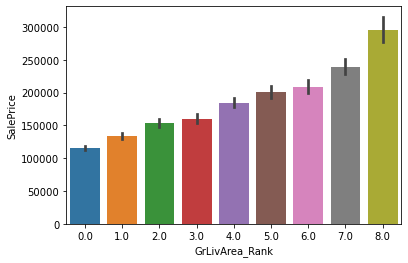

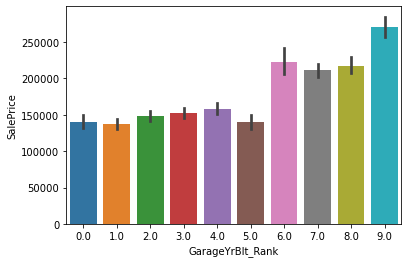

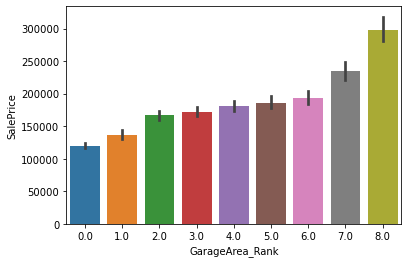

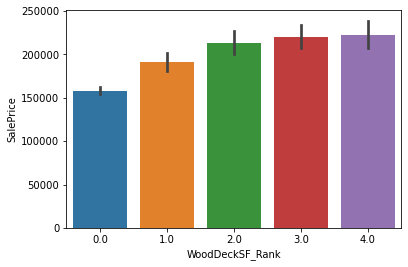

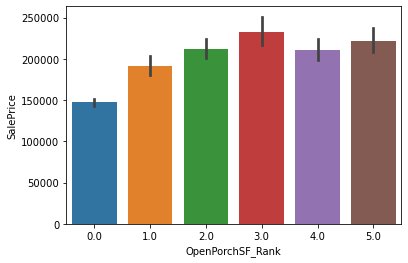

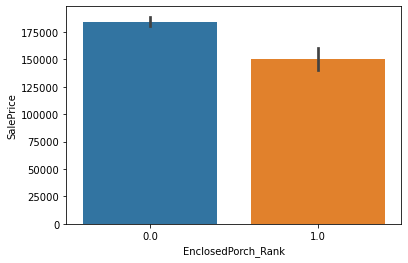

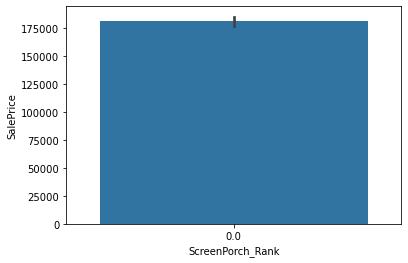

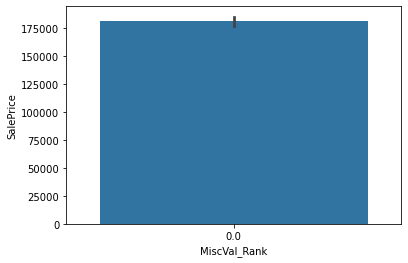

In [41]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="SalePrice",data=X_bin_combined, estimator=mean )
plt.show()

In [42]:
num_varlist = ['BsmtFinSF2', 'LowQualFinSF', "ScreenPorch", 'MiscVal']
num_2 = num_2.drop(num_varlist, axis = 1)

In [43]:
print(num_2.shape)
num_2.dtypes

(1460, 16)


LotFrontage      float64
LotArea          float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
GrLivArea        float64
GarageYrBlt      float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
dtype: object

In [44]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=8)

selector.fit_transform(num_2, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_2.iloc[:,cols]

In [45]:
select_features_df_num.iloc[0]

YearBuilt       2003.0
YearRemodAdd    2003.0
MasVnrArea       196.0
TotalBsmtSF      856.0
1stFlrSF         856.0
GrLivArea       1710.0
GarageYrBlt     2003.0
GarageArea       548.0
Name: 0, dtype: float64

In [54]:
char_1.isnull().mean()

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
MSSubClass       0.0
OverallQual      0.0
OverallCond      0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd 

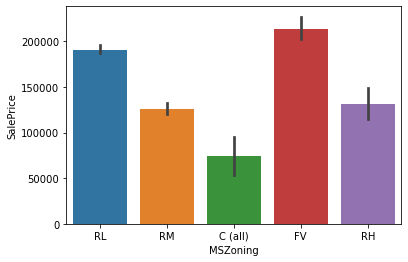

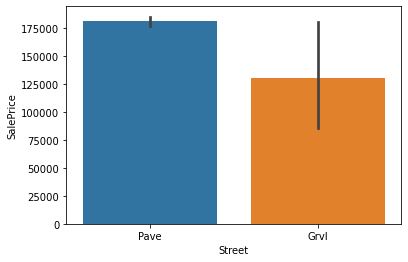

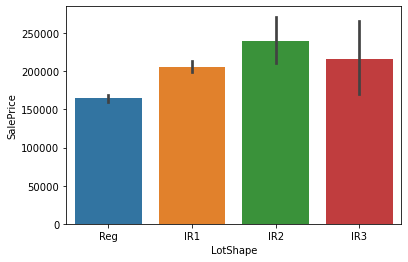

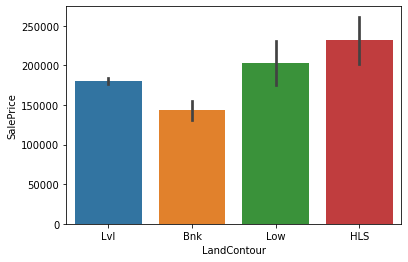

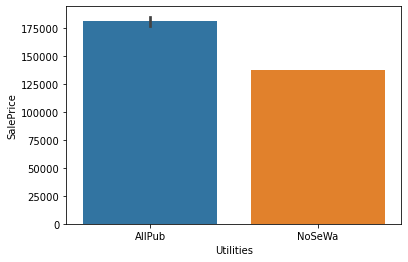

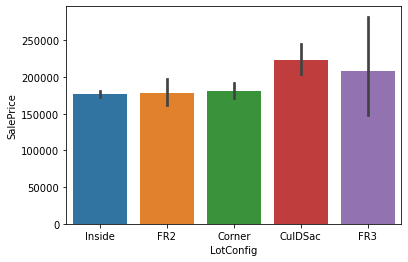

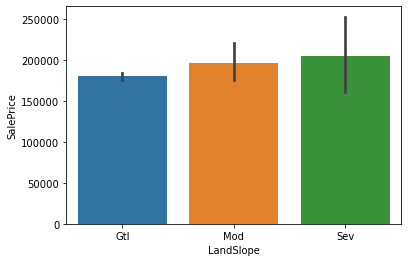

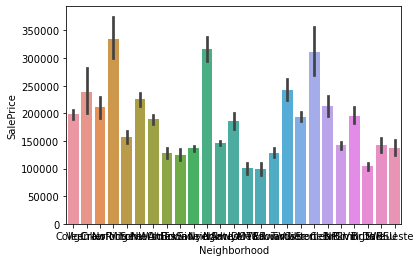

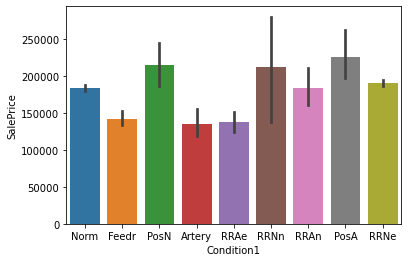

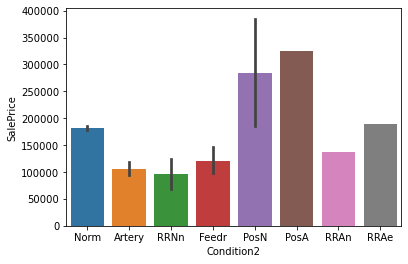

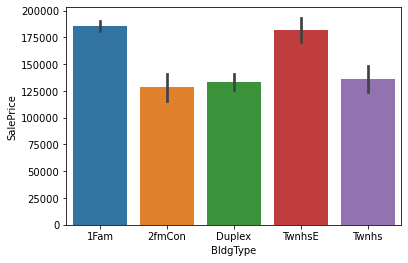

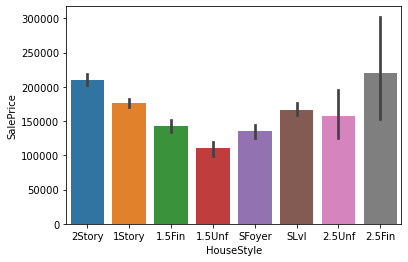

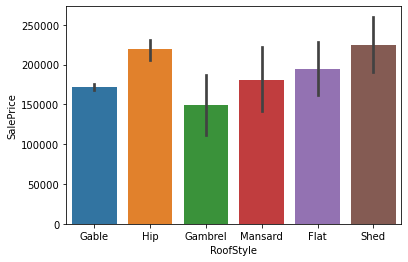

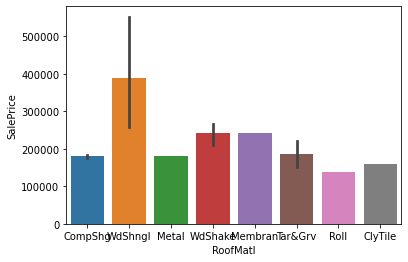

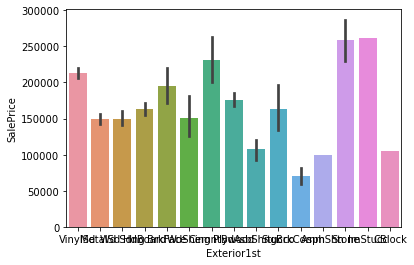

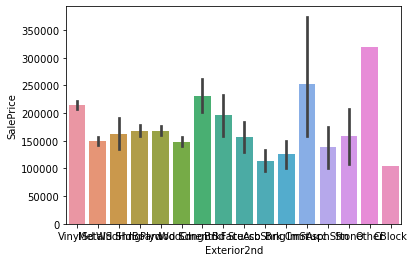

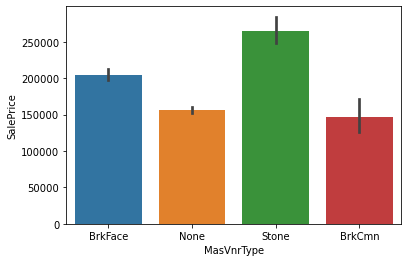

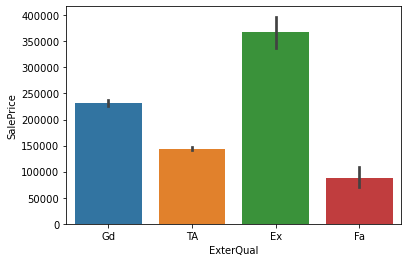

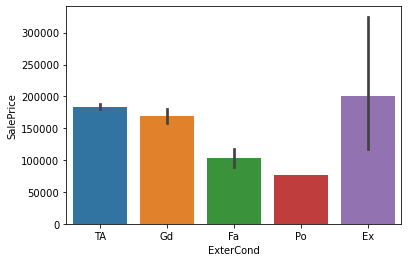

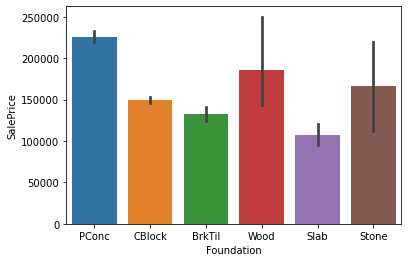

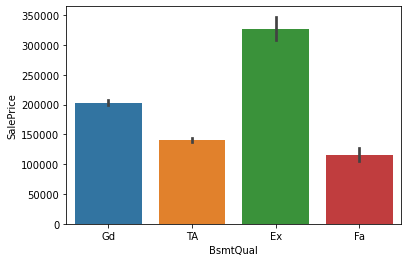

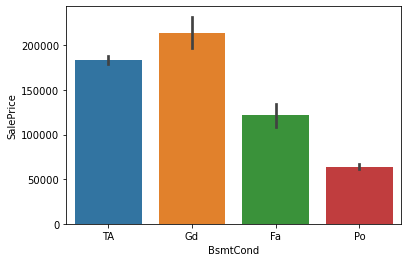

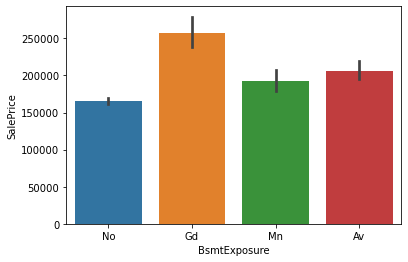

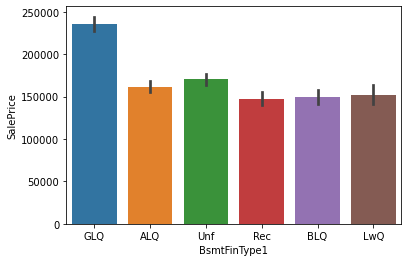

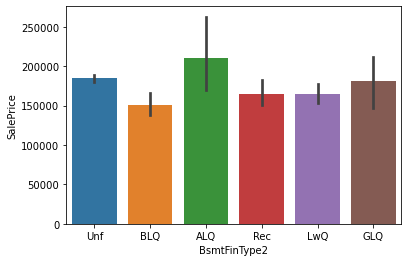

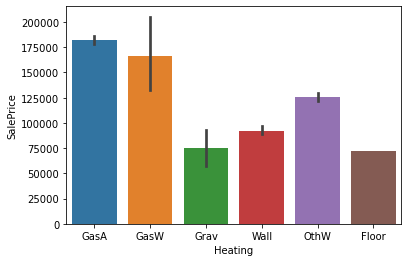

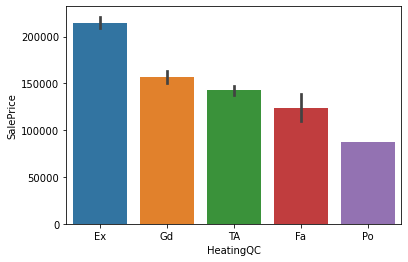

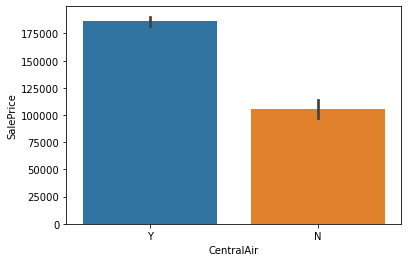

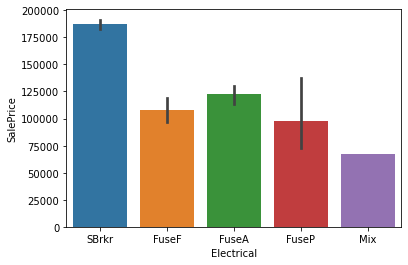

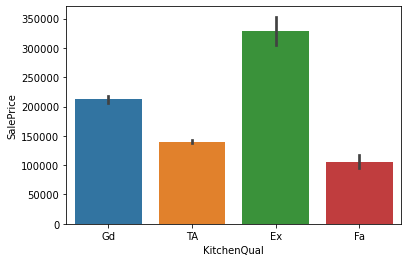

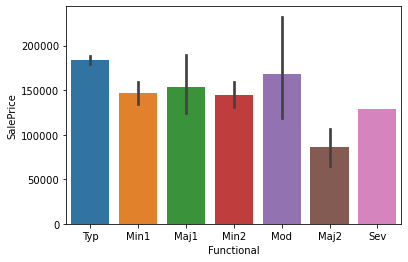

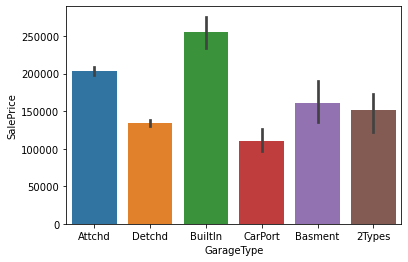

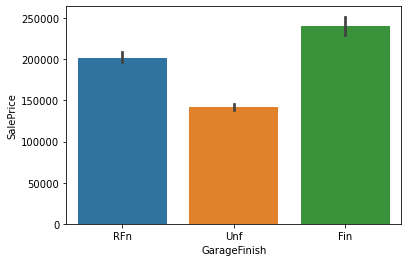

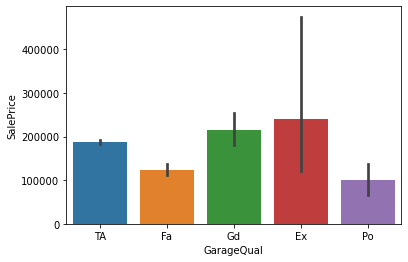

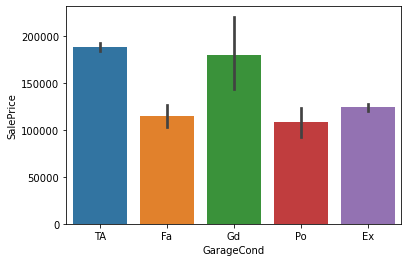

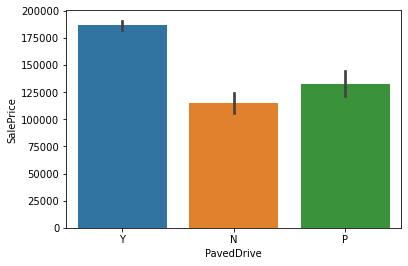

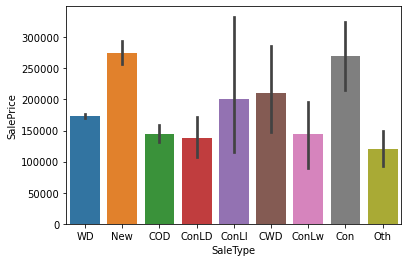

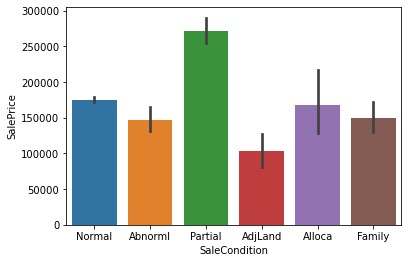

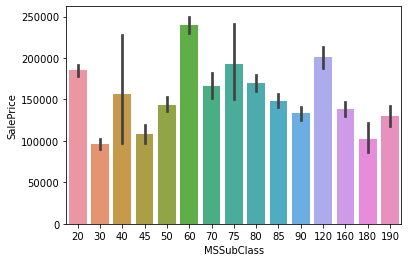

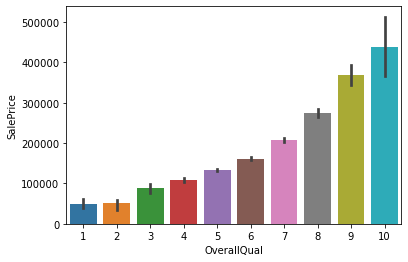

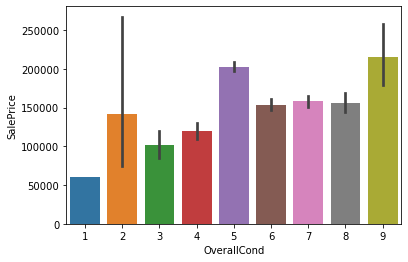

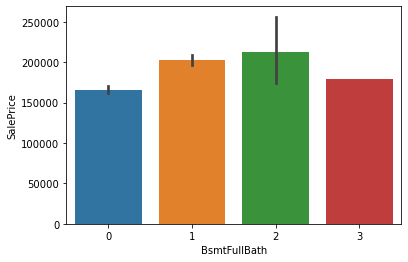

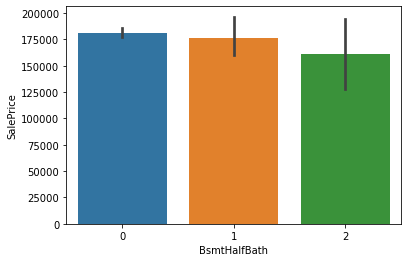

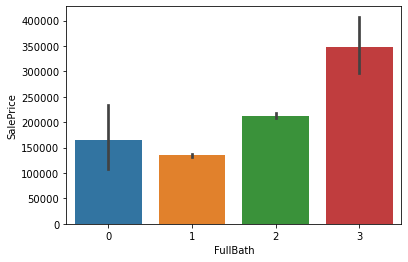

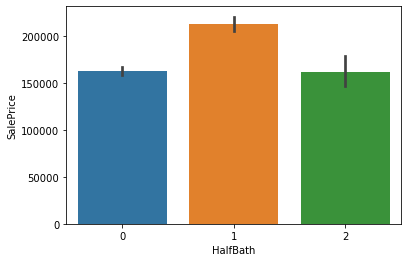

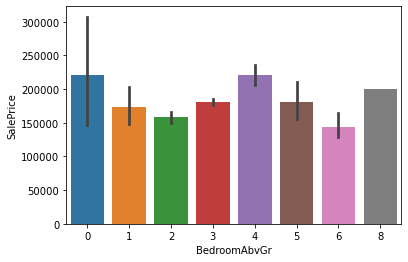

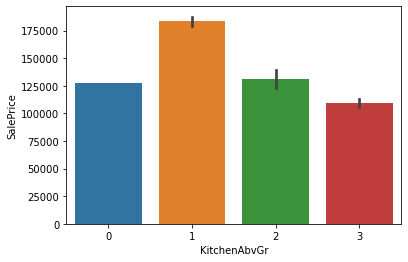

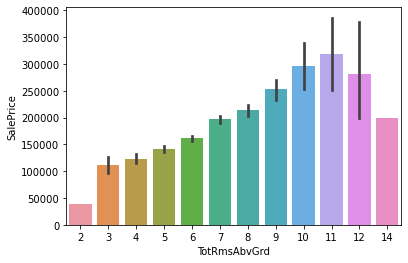

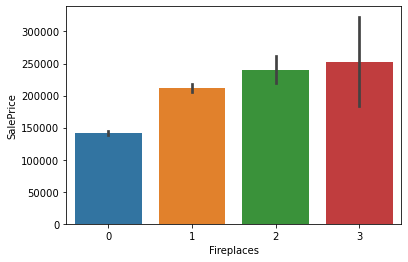

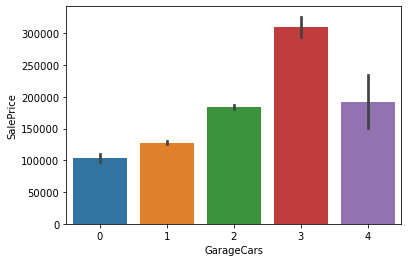

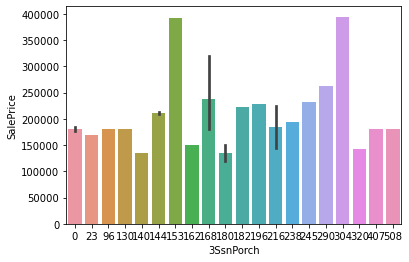

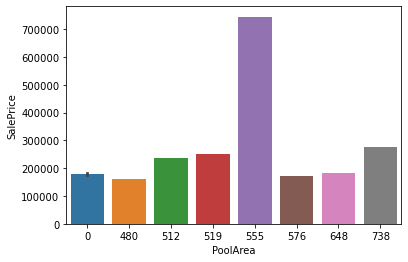

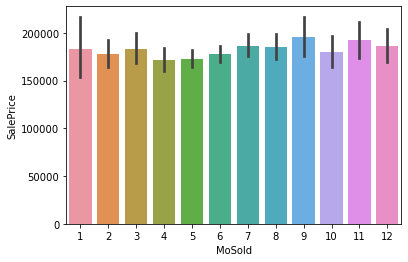

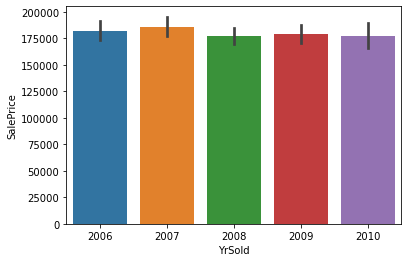

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="SalePrice",data=X_char_merged, estimator=mean )
plt.show()

In [57]:
 char_list = ['LotConfig', 'LandSlope', 'BsmtHalfBath', "MoSold", "YrSold"]

char_1 = char_1.drop(char_list, axis =1)


KeyError: "['LotConfig' 'LandSlope' 'BsmtHalfBath' 'MoSold' 'YrSold'] not found in axis"

In [58]:
char_1.shape

(1460, 49)

In [59]:
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(1460, 283)

In [60]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(f_regression, k=100)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [61]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [65]:
import xgboost

In [84]:
classifier = xgboost.XGBRegressor(base_score = 0.25,booster = "gbtree", gamma=0,
                                 learning_rate = 0.1, max_delta_step =0,max_depth=2,missing=1,
                                 n_estimators=900, n_jobs=1, objective ='reg:linear',random_state=1,
                                 reg_alpha=0,reg_lambda=1, scale_pos_weight=1,subsample=1)

In [85]:
classifier.fit(X_train,y_train)

[17:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=1, num_parallel_tree=1,
             objective='reg:linear', random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [86]:
y_pred_xgb = classifier.predict(X_test)

In [87]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [79]:
# metrics.plot_confusion_matrix(classifier,X_all,Y

In [88]:
from sklearn.metrics import mean_squared_error

In [96]:
mean_squared_error(y_test, y_pred_xgb)

725366013.7900034

In [2]:
classifier.score(xtest,ytest)

NameError: name 'classifier' is not defined